Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
#importing all the important libraries like numpy,pandas, matlplolib, pathlib , tensorflow for various operations


import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D , Dropout

In [ ]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
# if we are using google colab , then use the below path. if local means just change the path where u have stored the train and test datasets
data_dir_train = pathlib.Path(r"/content/gdrive/MyDrive/Melanoma Detection/Train")
data_dir_test = pathlib.Path(r'/content/gdrive/MyDrive/Melanoma Detection/Test')

In [ ]:
# Now check the counts of the train and test datasets images.

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

## This shows using 80 % for training and 20 % for validation with the train datasets.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

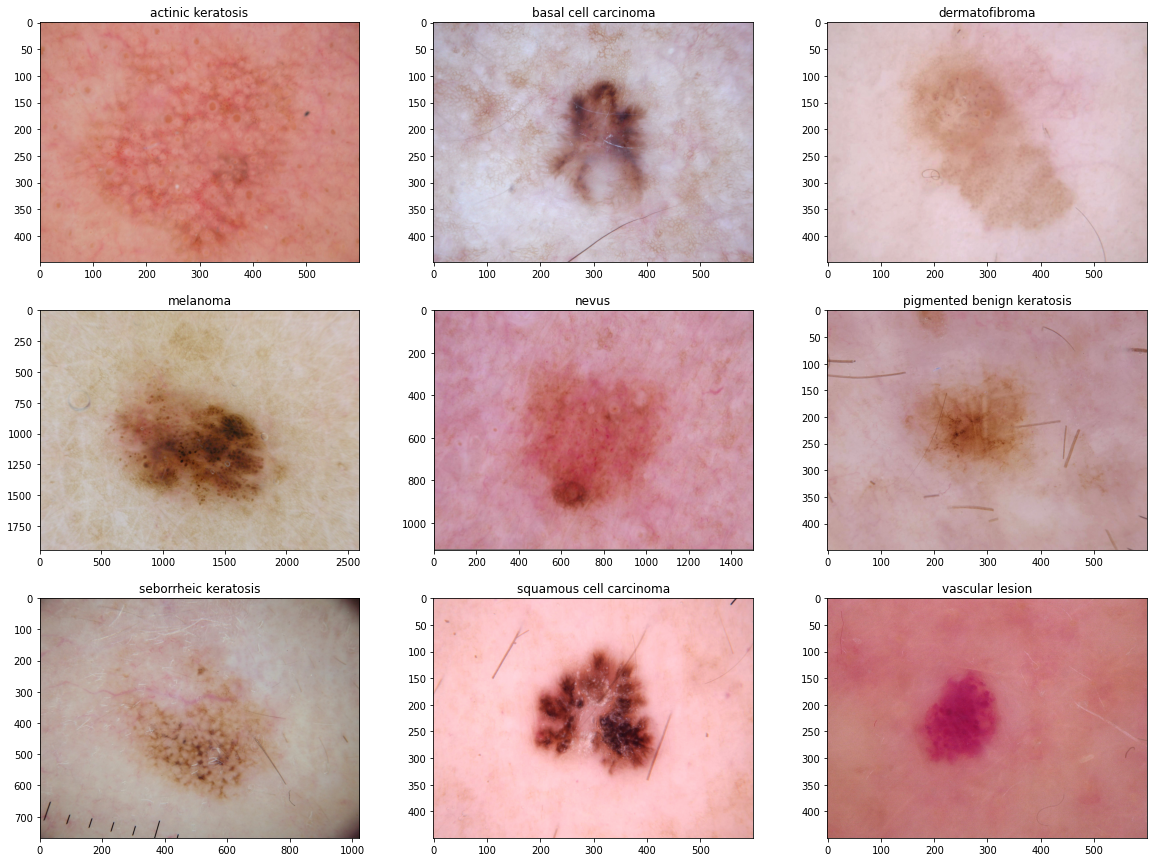

In [ ]:
# This is the code to see all the 9 classes in the train dataset to visualiza the data.

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
## Your code goes here

num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # Pooling


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # Pooling


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # Pooling

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        36928     
                                                        

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/20
56/56 [==============================] - 218s 788ms/step - loss: 2.0589 - accuracy: 0.2115 - val_loss: 1.9965 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 1.7842 - accuracy: 0.3571 - val_loss: 1.6176 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 1.5886 - accuracy: 0.4342 - val_loss: 1.5152 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 1.4981 - accuracy: 0.4860 - val_loss: 1.4912 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 5s 90ms/step - loss: 1.4549 - accuracy: 0.4944 - val_loss: 1.4565 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 1.4163 - accuracy: 0.4933 - val_loss: 1.5632 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 5s 92ms/step - loss: 1.3898 - accuracy: 0.5128 - val_loss: 1.4626 - val_accuracy: 0.5213
Epoch 8/20

### Visualizing training results

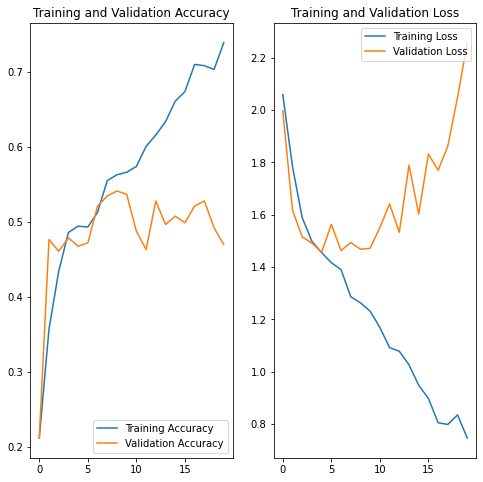

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### 1. From the Epoch  and Visualizing training results , it is clear that the model is overfitting.
#### 2. Training Accuracy - 73 % and Validation Accuracy - 46 %
#### 3. Validation Loss is very high compared to the training loss which again proves some overfitting happens.
#### 4. It seems the model is memorizing the data instead of learning from it

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation=tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.3)
])

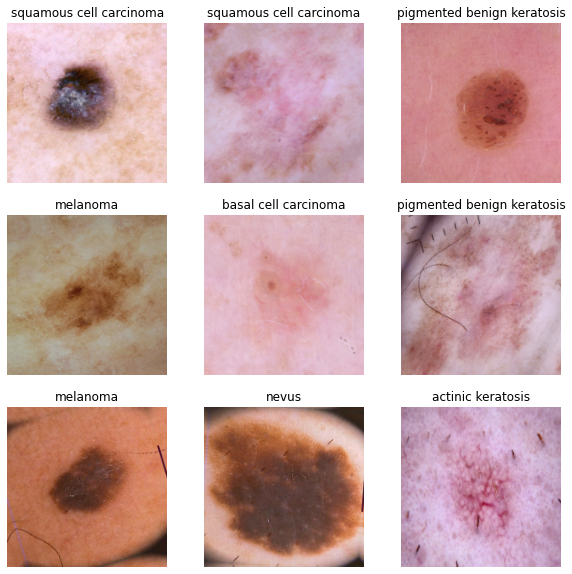

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))  # Pooling


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))  # Pooling


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))  # Pooling
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [ ]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 98ms/step - loss: 2.0796 - accuracy: 0.2109 - val_loss: 1.8765 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 5s 96ms/step - loss: 1.9661 - accuracy: 0.2690 - val_loss: 1.9688 - val_accuracy: 0.2461
Epoch 3/20
56/56 [==============================] - 5s 97ms/step - loss: 1.7960 - accuracy: 0.3443 - val_loss: 1.5952 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6525 - accuracy: 0.3923 - val_loss: 1.5702 - val_accuracy: 0.4385
Epoch 5/20
56/56 [==============================] - 5s 97ms/step - loss: 1.5793 - accuracy: 0.4180 - val_loss: 1.5764 - val_accuracy: 0.4430
Epoch 6/20
56/56 [==============================] - 5s 97ms/step - loss: 1.6599 - accuracy: 0.4102 - val_loss: 1.7053 - val_accuracy: 0.3870
Epoch 7/20
56/56 [==============================] - 5s 96ms/step - loss: 1.6213 - accuracy: 0.4414 - val_loss: 1.6109 - val_accuracy: 0.4340
Epoch 8/20
56

### Visualizing the results

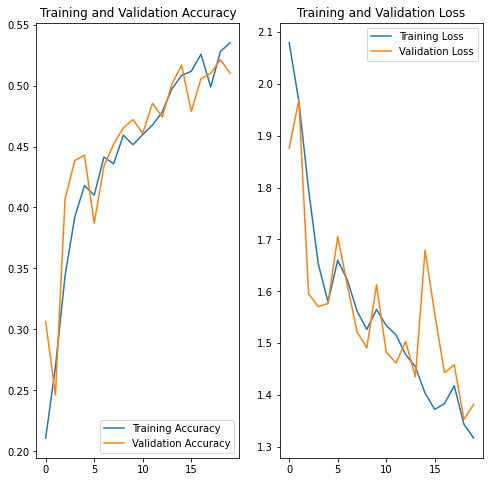

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### 1. Accuracy of the training data is reduced but the accuracy of the validation data is increased
#### 2. Training Accuracy - 53 % and Validation accuracy - 51 %
#### 3. From the results it is clear that overfitting is reduced due to data augmentation strategy
#### 4. Validation Loss - 1.3 % which is greatly reduced from 1st model which has 2.25 %
#### 5. To increase the accuracy , we might opt for increasing the epochs.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

for i in class_names:
    class_directory = pathlib.Path(r"/content/gdrive/MyDrive/Melanoma Detection/Train/" + i + '/')
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')




actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

#### 1. seborrheic keratosis - 77 has the least number of samples
#### 2. melanoma - 438 and pigmented benign keratosis - 462 dominate the data in terms proportionate number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= "/content/gdrive/MyDrive/Melanoma Detection/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060B4E3D10>: 100%|██████████| 500/500 [00:21<00:00, 23.09 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060B4DE090>: 100%|██████████| 500/500 [00:21<00:00, 23.17 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060A1D1950>: 100%|██████████| 500/500 [00:21<00:00, 22.98 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=944x1127 at 0x7F060BB86DD0>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060A1745D0>: 100%|██████████| 500/500 [01:27<00:00,  5.71 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F060B4F0250>: 100%|██████████| 500/500 [00:18<00:00, 27.47 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F060B41ED90>: 100%|██████████| 500/500 [00:43<00:00, 11.51 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060A1CE690>: 100%|██████████| 500/500 [00:18<00:00, 27.77 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F060BBE5710>: 100%|██████████| 500/500 [00:18<00:00, 27.46 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
# after using augmentor , the newly folder output is created with 500 extra images to the original dataset. So the total count of the image is shown below
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0026163.jpg_b30e65b5-4ce5-42d8-89d3-8a330aef1ada.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0028714.jpg_bbfce03f-3e63-4339-abfe-5afe0e98e3af.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0029448.jpg_d0a6ecb8-48da-413b-9ea0-3c600eeaf13b.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0025873.jpg_f1d5d792-3302-4e93-8fdb-a056728315f0.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0032745.jpg_5dbac079-e59f-4d8a-a46f-769aa973d33f.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/Train/vascular lesion/output/vascular lesion_original_ISIC_0026393.jpg_08cac3ce-3a79-47f7-83de-408b54ec863e.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection/T

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
# Now the Total image samples with respective to 9 classes are shown below seperately

for i in class_names:
    class_directory = pathlib.Path(r"/content/gdrive/MyDrive/Melanoma Detection/Train/" + i + '/')
    class_directory_out = pathlib.Path(r"/content/gdrive/MyDrive/Melanoma Detection/Train/" + i + '/output/')
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')


actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


In [ ]:
df2['Label'].value_counts()

vascular lesion               500
squamous cell carcinoma       500
pigmented benign keratosis    500
dermatofibroma                500
melanoma                      500
seborrheic keratosis          500
basal cell carcinoma          500
nevus                         500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Melanoma Detection/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

num_classes = 9
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # pooling


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # pooling


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # pooling
model.add(Dropout(0.2)) # Dropout

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = "softmax"))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)
# your model fit code

Epoch 1/30
169/169 [==============================] - 36s 199ms/step - loss: 2.0307 - accuracy: 0.2107 - val_loss: 1.9730 - val_accuracy: 0.2227
Epoch 2/30
169/169 [==============================] - 33s 191ms/step - loss: 1.7262 - accuracy: 0.3375 - val_loss: 1.5675 - val_accuracy: 0.4039
Epoch 3/30
169/169 [==============================] - 34s 196ms/step - loss: 1.6250 - accuracy: 0.3674 - val_loss: 1.5967 - val_accuracy: 0.3756
Epoch 4/30
169/169 [==============================] - 33s 191ms/step - loss: 1.5639 - accuracy: 0.3993 - val_loss: 1.6419 - val_accuracy: 0.3705
Epoch 5/30
169/169 [==============================] - 33s 191ms/step - loss: 1.5258 - accuracy: 0.4130 - val_loss: 1.4629 - val_accuracy: 0.4276
Epoch 6/30
169/169 [==============================] - 34s 196ms/step - loss: 1.4981 - accuracy: 0.4195 - val_loss: 1.5177 - val_accuracy: 0.4209
Epoch 7/30
169/169 [==============================] - 33s 189ms/step - loss: 1.4727 - accuracy: 0.4338 - val_loss: 1.4372 - val_ac

#### **Todo:**  Visualize the model results

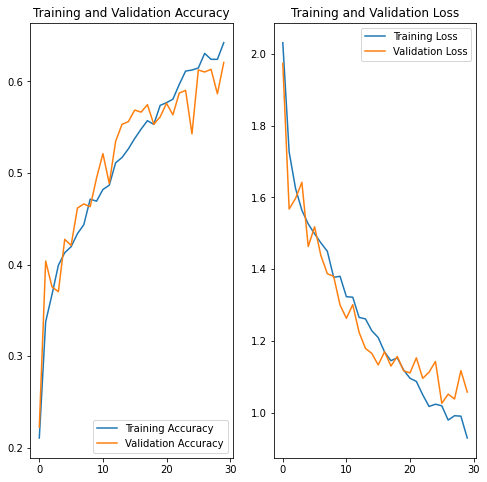

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

#### 1. Now the Latest CNN model is performing well after using augmentor library which helps to remove the class imbalance.
#### 2. The Model is not overfitting now
#### 3. The Model can be further improved by using some hyperparameters
#### 4. To increase the accuracy , we might opt for increasing the epochs.
#### 5. Since the Model being huge , its difficult to train because of issues such as Vanishing and exploding gradient.
#### 6. After Class Imbalance (Training Loss - 0.92 and Validation Loss - 1.05) which is reduced from (Training Loss - 1.31 and Validation Loss - 1.38) before class 